# Check LSTM model results
## Load packages and the result file

In [25]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
lstm_results = np.load("models/lstm_results.npz", allow_pickle = True)
lstm_results = lstm_results["lstm_results"][()]

## Analyze results
### Mean correlation across 10 folds for each vowel

In [27]:
for v in lstm_results:
    cv_cors = lstm_results[v]["cv_cor"]
    rs = []
    for fold in cv_cors:
        rs.append(np.mean(cv_cors[fold]))
    print("Mean Pearson correlation r for vowel {}: {}".format(v, np.mean(rs)))

Mean Pearson correlation r for vowel AE: 0.2556032812964003
Mean Pearson correlation r for vowel AH: 0.18434004866926615
Mean Pearson correlation r for vowel EH: 0.37810391644409264
Mean Pearson correlation r for vowel IH: 0.1934307856122862
Mean Pearson correlation r for vowel IY: 0.0825203605691257


### Mean MSE across 10 folds for each vowel

In [28]:
for v in lstm_results:
    cv_mses = lstm_results[v]["cv_mse"]
    mses = []
    for fold in cv_mses:
        mses.append(np.mean(cv_mses[fold]))
    print("Mean MSE for vowel {}: {}".format(v, np.mean(mses)))

Mean MSE for vowel AE: 0.0009558381279930472
Mean MSE for vowel AH: 0.0011278006713837385
Mean MSE for vowel EH: 0.0012137884041294456
Mean MSE for vowel IH: 0.0009270546725019813
Mean MSE for vowel IY: 0.001055337954312563


## Visualizing the results

In [52]:
# Load predictions of the mTRF model
mtrf_preds = np.load("models/mtrf_env_preds.npz", allow_pickle = True)
mtrf_preds = mtrf_preds["mtrf_preds"][()]

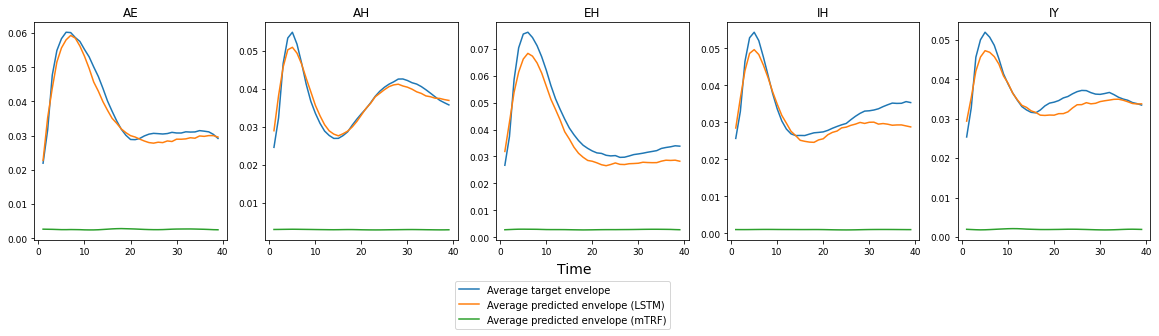

In [53]:
fig, axs = plt.subplots(1, 5, figsize = (20, 4))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)
fig.text(0.5, 0.01, "Time", ha = "center", fontsize = 14)
for i, v in enumerate(lstm_results):
    
    targe_envs = np.array([x.numpy() for x in lstm_results[v]["targets"]])
    pred_envs_lstm =  np.array([x.numpy() for x in lstm_results[v]["preds"]])
    
    avg_target_env = np.mean(targe_envs, axis = 0)
    avg_pred_env_lstm = np.mean(pred_envs_lstm, axis = 0)
    avg_pred_env_mtrf = np.mean(mtrf_preds[v]["preds"], axis = 0)
    
    t = range(1, len(avg_target_env) + 1)
    
    axs[i].plot(t, avg_target_env, label = "Average target envelope")
    axs[i].plot(t, avg_pred_env_lstm, label = "Average predicted envelope (LSTM)")
    axs[i].plot(t, avg_pred_env_mtrf, label = "Average predicted envelope (mTRF)")
    axs[i].set_title(v)
    axs[i].tick_params(axis = 'both', which = 'major', labelsize = 9)
    handles, labels = axs[i].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor = (0.57, 0.0))